In [1]:
import matplotlib.pyplot as plt
from equation import EuropeanCall
from config import EuropeanCallConfig
from solver import FeedForwardModel
import tensorflow.compat.v1 as tf
import numpy as np
from scipy.stats import norm

In [2]:
def blackscholes_price(K, T, S, vol, r=0.2, q=0, callput='call'):
    F = S*np.exp((r-q)*T)
    v = np.sqrt(vol**2*T)
    d1 = np.log(F/K)/v + 0.5*v
    d2 = d1 - v
    try:
        opttype = {'call':1, 'put':-1}[callput.lower()]
    except:
        raise ValueError('The value of callput must be either "call" or "put".')
    price = opttype*(F*norm.cdf(opttype*d1)-K*norm.cdf(opttype*d2))*np.exp(-r*T)
    return price


In [3]:
#params
dim, total_time, num_time_interval = 1, 1, 10
sigma, r, K = 0.2, 0.2, 100
ob_range = (60, 140)

#fit
eurOption= EuropeanCall(dim, total_time, num_time_interval, sigma, r, K, ob_range)
tf.reset_default_graph()
with tf.Session() as sess:
    model = FeedForwardModel(sess, eurOption, EuropeanCallConfig())
    model.build()
    f_graphs,z_graphs= model.train()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
the 1 time of pre-train
step:     0,loss: 2.4209e+02,  elapsed time   7
step:  1000,loss: 3.7118e-03,  elapsed time  13
step:  2000,loss: 4.8126e-03,  elapsed time  19
step:  3000,loss: 3.6887e-02,  elapsed time  25
step:  4000,loss: 1.8947e-02,  elapsed time  31
step:  5000,loss: 1.4716e-02,  elapsed time  36
Finish pre train
step:     0,loss: 1.2819e+03,  elapsed time  36
step:  1000,loss: 3.8187e+01,  elapsed time  41
step:  2000,loss: 1.6667e+01,  elapsed time  47
step:  3000,loss: 4.6770e+00,  elapsed time  52
step:  4000,loss: 5.1959e+00,  elapsed time  58
step:  5000,loss: 5.2031e+00,  elapsed time  63
step:  6000,loss: 4.2887e+00,  elapsed time  68
step:  7000,loss: 5.2893e+00,  elapsed time  74
step:  8000,loss: 4.4353e+00,  elapsed time  80
step:  9000,loss: 4.6648e+00,  elapsed time  85
step: 10000,loss: 4.7481e+00,  elapsed time  91
step: 11000,loss: 4.7699e+00,  elapsed time  96
step: 12000,lo

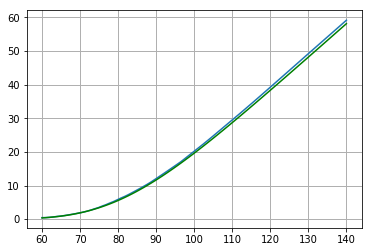

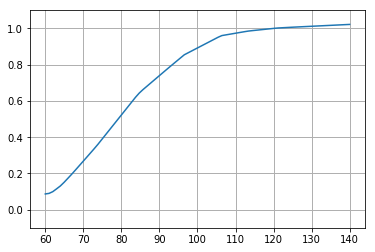

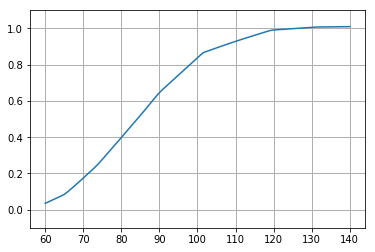

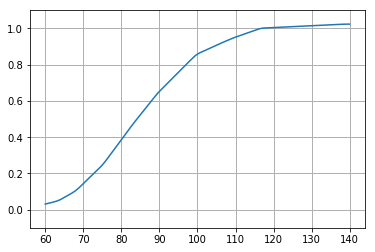

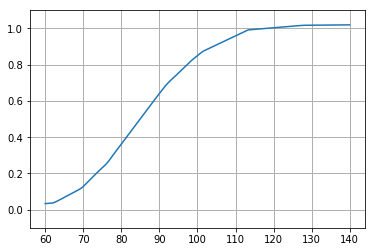

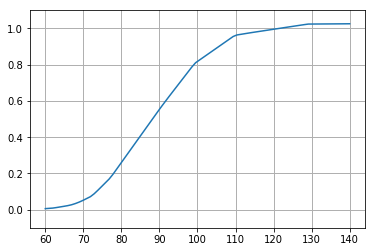

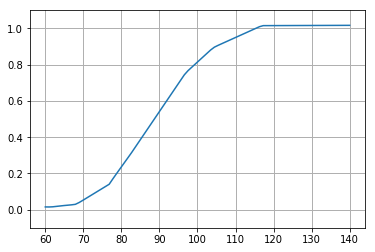

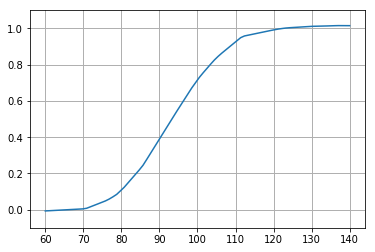

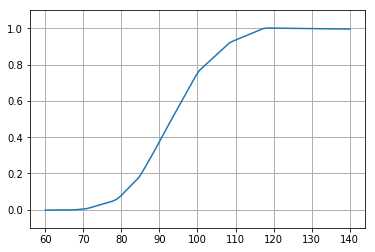

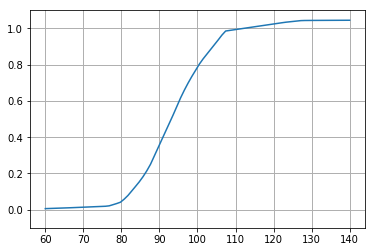

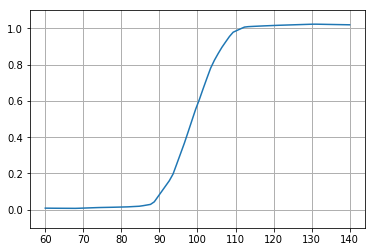

In [4]:
#plot
fig, ax = plt.subplots()
l, u = ob_range
num = EuropeanCallConfig().ob_num
ax.plot(np.linspace(l, u, num), f_graphs.flatten())
ax.plot(np.linspace(l, u, num), blackscholes_price(K, total_time, np.linspace(l, u, num), sigma, r, 0, 'call'),'g')
plt.grid(linewidth = 1)

for i in range(len(z_graphs)):
    fig, ax = plt.subplots()
    ax.plot(np.linspace(l, u, num),np.array(z_graphs[i]).flatten())
    plt.ylim(-0.1, 1.1)
    plt.grid(linewidth = 1)